# Análisis de valores nulos

En este capítulo se identifican y cuantifican los valores faltantes en la base de datos.  
Los valores nulos son un problema frecuente en análisis de datos y deben diagnosticarse antes de aplicar cualquier técnica de imputación.

**Puntos clave:**
- Contar los valores faltantes por variable.
- Calcular el porcentaje de valores nulos.
- Visualizar la distribución de los datos faltantes.
- Determinar qué variables requieren imputación prioritaria.

Este diagnóstico permitirá clasificar los mecanismos de ausencia y seleccionar las técnicas de imputación más adecuadas.
 



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Subir un nivel desde la carpeta "secciones"
csv_path = Path.cwd().parent / "base_imputacion_mixta_1000.csv"

df = pd.read_csv(csv_path)

print("Dimensiones:", df.shape)
df.head()



Dimensiones: (1000, 12)


,fecha,sexo,ciudad,nivel_educativo,segmento,estado_civil,edad,altura_cm,ingresos,gasto_mensual,puntuacion_credito,demanda
0,2024-01-01,F,Medellín,NaN,B,Unión libre,19.0,161.821754,3574.753806,1832.731832,640.465372,119.202995
1,2024-01-02,F,Barranquilla,NaN,B,NaN,52.0,167.819566,3163.626815,NaN,533.108430,124.457874
2,2024-01-03,M,Bogotá,Secundaria,B,Soltero/a,38.0,165.756219,2765.672259,1219.535074,491.016910,NaN
3,2024-01-04,F,Bogotá,NaN,B,Casado/a,57.0,160.642670,4320.397345,1908.324816,NaN,129.426792
4,2024-01-05,M,Cali,Técnico,B,Soltero/a,67.0,151.402909,NaN,1887.385697,610.213994,133.916319


### Comentario del dataset

El dataset cargado contiene **1000 filas y 12 columnas**.  
En la vista preliminar de las primeras 5 filas se observan:

- **Variables de tipo fecha y categóricas:**  
  - `fecha`: registros diarios (formato YYYY-MM-DD).  
  - `sexo`, `ciudad`, `nivel_educativo`, `segmento`, `estado_civil`: variables demográficas, algunas con valores faltantes (`NaN`).  

- **Variables numéricas:**  
  - `edad`: valores entre 19 y 67 años en las primeras filas.  
  - `altura_cm`: estatura expresada en centímetros.  
  - `ingresos`, `gasto_mensual`, `puntuacion_credito`, `demanda`: datos económicos y de consumo, con valores faltantes en varias filas.  

 **Observación:**  
El dataset mezcla datos demográficos, físicos y financieros. Se aprecian **valores ausentes** en `nivel_educativo`, `estado_civil`, `ingresos`, `gasto_mensual`, `puntuacion_credito` y `demanda`, lo que resalta la necesidad de aplicar técnicas de imputación antes de cualquier análisis.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline  # (opcional en Jupyter)
nul_counts = df.isna().sum().sort_values(ascending=False)
nul_pct = (df.isna().mean()*100).sort_values(ascending=False)
tabla_nulos = pd.DataFrame({"faltantes": nul_counts, "%": nul_pct})

tabla_nulos.head(20)


,faltantes,%
puntuacion_credito,500,50.0
estado_civil,350,35.0
gasto_mensual,250,25.0
segmento,200,20.0
demanda,150,15.0
ingresos,120,12.0
nivel_educativo,100,10.0
altura_cm,80,8.0
ciudad,50,5.0
edad,30,3.0


### Análisis de valores faltantes

La tabla muestra el conteo y el porcentaje de datos faltantes por variable:

- **Mayor proporción de nulos:**
  - `puntuacion_credito`: 50% (la mitad de los registros no tiene información).
  - `estado_civil`: 35%.
  - `gasto_mensual`: 25%.  

- **Proporción intermedia:**
  - `segmento`: 20%.
  - `demanda`: 15%.
  - `ingresos`: 12%.
  - `nivel_educativo`: 10%.  

- **Proporción baja:**
  - `altura_cm`: 8%.
  - `ciudad`: 5%.
  - `edad`: 3%.
  - `sexo`: 2%.  

- **Sin faltantes:**
  - `fecha` está completa (0%).

 **Conclusión:**  
Las variables críticas con más del 30% de nulos (`puntuacion_credito`, `estado_civil`) requieren estrategias específicas de imputación o análisis cuidadoso, ya que su ausencia masiva podría sesgar los resultados. En contraste, variables como `sexo`, `edad` y `ciudad` apenas presentan vacíos y son más fáciles de manejar.


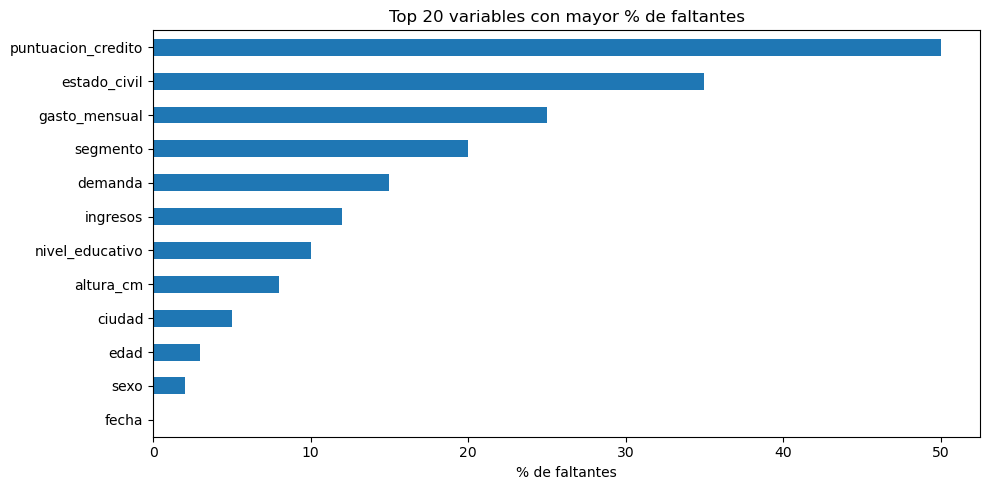

In [5]:
# Gráfico de barras (top 20 variables con más faltantes)
top = 20
plt.figure(figsize=(10,5))
tabla_nulos.head(top).sort_values("%")["%"].plot(kind="barh")
plt.xlabel("% de faltantes")
plt.title(f"Top {top} variables con mayor % de faltantes")
plt.tight_layout()
plt.show()


### Análisis de variables con mayor % de faltantes

El gráfico muestra el porcentaje de datos faltantes por variable:

- **Altamente afectadas:**
  - `puntuacion_credito` (~50%) y `estado_civil` (~35%) concentran la mayor proporción de nulos, lo que puede comprometer su utilidad directa en modelos.  

- **Nivel intermedio:**
  - `gasto_mensual` (~25%) y `segmento` (~20%).  
  - `demanda` (15%) e `ingresos` (12%).  

- **Bajo nivel de faltantes:**
  - `nivel_educativo` (10%), `altura_cm` (8%), `ciudad` (5%), `edad` (3%) y `sexo` (2%).  

- **Sin faltantes:**
  - `fecha` está completa.

 **Conclusión:**  
Las variables críticas con más del 30% de nulos (`puntuacion_credito`, `estado_civil`) requieren una estrategia de imputación avanzada o replantear su uso. Las variables con menor porcentaje pueden imputarse con técnicas simples (media, moda, mediana), mientras que las intermedias se benefician de métodos más robustos como **KNN** o **modelos predictivos**.


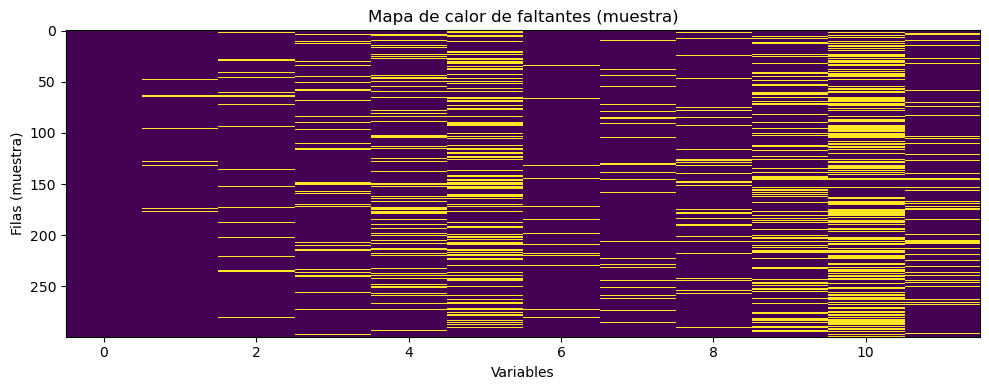

In [6]:
# Mapa de calor simple de faltantes en una muestra (para no saturar)
sample = df.sample(min(300, len(df)), random_state=42)
plt.figure(figsize=(10,4))
plt.imshow(sample.isna(), aspect="auto", interpolation="nearest")
plt.title("Mapa de calor de faltantes (muestra)")
plt.xlabel("Variables")
plt.ylabel("Filas (muestra)")
plt.tight_layout()
plt.show()


### Mapa de calor de valores faltantes

El gráfico representa las filas (muestra de registros) en el eje Y y las variables en el eje X.  
- **Color morado:** valores presentes.  
- **Color amarillo:** valores faltantes.

 **Interpretación:**
- Se observa que los **faltantes están distribuidos de manera dispersa**, afectando distintas filas y columnas.  
- Algunas variables presentan **bloques más densos de amarillo**, lo que coincide con lo visto en el análisis previo: `puntuacion_credito`, `estado_civil` y `gasto_mensual` concentran más nulos.  
- No hay un patrón único de filas completamente vacías, lo que indica que la **incompletitud es parcial** y afecta diferentes combinaciones de variables.

 **Conclusión:**  
Este mapa confirma la necesidad de **estrategias diferenciadas de imputación** según la variable, ya que los faltantes no se concentran en casos específicos (filas completas), sino que se distribuyen entre múltiples observaciones.

